<a href="https://colab.research.google.com/github/Tiafarahani/6292023/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Tiafarahani/6292023/main/Dry_Bean.csv")
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:

data.dropna(inplace =True)
des=data.describe()
des.loc['sum'] = data.sum()
des

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,13611.000000,13611.000000,1.361100e+04,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,5.304828e+04,8.552835e+02,3.201419e+02,2.022707e+02,1.583242,0.750895,5.376820e+04,2.530642e+02,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,2.932410e+04,2.142897e+02,8.569419e+01,4.497009e+01,0.246678,0.092002,2.977492e+04,5.917712e+01,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,2.042000e+04,5.247360e+02,1.836012e+02,1.225127e+02,1.024868,0.218951,2.068400e+04,1.612438e+02,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3.632800e+04,7.035235e+02,2.533036e+02,1.758482e+02,1.432307,0.715928,3.671450e+04,2.150680e+02,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,4.465200e+04,7.949410e+02,2.968834e+02,1.924317e+02,1.551124,0.764441,4.517800e+04,2.384380e+02,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,6.133200e+04,9.772130e+02,3.764950e+02,2.170317e+02,1.707109,0.810466,6.229400e+04,2.794465e+02,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,2.546160e+05,1.985370e+03,7.388602e+02,4.601985e+02,2.430306,0.911423,2.632610e+05,5.693744e+02,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733
sum,7.220402e+08,1.164126e+07,4.357451e+06,2.753107e+06,21549.506576,10220.430884,7.318390e+08,3.444457e+06,10204.612969,13436.001244,11886.239006,10886.944574,89.337275,23.355759,8759.905958,13543.806737


In [ ]:
corr_matrix=data.corr()
hcorr=[]
for i in range(len(corr_matrix.columns)-1):
    for j in range(len(corr_matrix.index)-1):
        if (corr_matrix.iloc[i,j]) > 0.8:
            hcorr.append((corr_matrix.columns[i],corr_matrix.index[j],corr_matrix.iloc[i,j]))
hcorr=pd.DataFrame(hcorr,columns=["f1","f2","f3"])
hcorr

<ipython-input-57-352b44f39d18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


,f1,f2,f3
0,Area,Area,1.000000
1,Area,Perimeter,0.966722
2,Area,MajorAxisLength,0.931834
3,Area,MinorAxisLength,0.951602
4,Area,ConvexArea,0.999939
5,Area,EquivDiameter,0.984968
6,Perimeter,Area,0.966722
7,Perimeter,Perimeter,1.000000
8,Perimeter,MajorAxisLength,0.977338
9,Perimeter,MinorAxisLength,0.913179


In [ ]:
m=[]
f =[m.append(hcorr.iloc[i,0])for i in range(len(hcorr))if hcorr.iloc[i,0] not in m]
correlation = [list(hcorr[hcorr.iloc[:,0] == i].iloc[:,1].values) for i in m]
sorted_list=[x for _, x in sorted(zip(map(len,correlation),correlation))]
sorted_list[-1]
f = data[sorted_list[-1]]
corr_m = f.corr()
corr_m

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter
Area,1.000000,0.966722,0.931834,0.951602,0.999939,0.984968
Perimeter,0.966722,1.000000,0.977338,0.913179,0.967689,0.991380
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.932607,0.961733
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,0.951339,0.948539
ConvexArea,0.999939,0.967689,0.932607,0.951339,1.000000,0.985226
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.985226,1.000000


<Axes: >

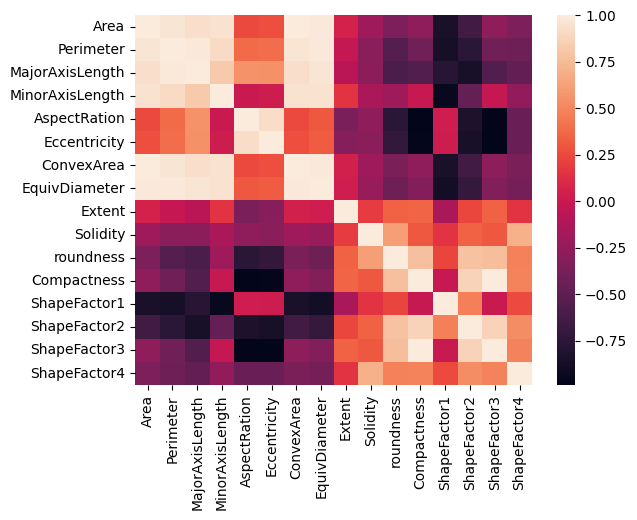

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Class']]).toarray())
data = data.join(encoder_df)
data = data.drop(['Class'], axis=1)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,...,0.001852,0.668237,0.995222,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(range(len(X)), size=self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids based on the mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = []

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]

            if len(cluster_points) > 0:
                new_centroid = cluster_points.mean(axis=0)
                new_centroids.append(new_centroid)

        return np.array(new_centroids)

# Generate sample data
np.random.seed(42)
X = np.array(data)
# Apply K-means algorithm
k = 7
kmeans = KMeans(n_clusters=k)
labels = list(kmeans.fit(X))



In [ ]:
clusters = [[] for i in range(k)]
for i in range(len(labels)):
  clusters[labels[i]].append(i)


In [ ]:
pca = PCA(n_components=2)
pcdf = pd.DataFrame(data=pca.fit_transform(data.values), columns=['1', '2'])
pcdf

,1,2
0,-35149.923738,-22.087048
1,-34586.321890,58.586349
2,-33764.026291,-38.995578
3,-32586.564121,239.179182
4,-32712.806082,-71.439994
...,...,...
13606,-15707.436352,-99.766985
13607,-15714.623854,-112.800751
13608,-15634.515182,-87.239086
13609,-15559.055021,-24.031046


In [ ]:
clus = []
for item in clusters:
  clus.append(pcdf.loc[item])

clus

[                 1           2
 2432  17131.910822  626.971959
 2436  17218.986017  562.209191
 2443  17185.710337  279.210989
 2444  17306.697228  352.981274
 2445  17550.631546  390.727315
 ...            ...         ...
 7423  29015.962972 -111.644997
 7424  30218.262424 -276.736718
 7425  30372.342898 -198.972073
 7426  31838.913089  -10.174356
 7427  32051.236289 -181.875533
 
 [1652 rows x 2 columns],
                  1           2
 3088  36711.771098  555.556890
 3091  36751.917228  518.039404
 3092  36797.738403  563.392820
 3093  36682.001886  442.210473
 3094  36748.340510  507.020083
 ...            ...         ...
 5497  78802.443021  608.156491
 5498  87587.826884 -488.944335
 5499  89108.671368  -46.915915
 5500  90231.672273  129.162765
 7428  41107.239326  -41.360478
 
 [817 rows x 2 columns],
                  1           2
 1552 -14178.500923   99.020230
 1554 -14345.580758 -109.368255
 1555 -14330.581112  -96.297417
 1556 -14370.605784 -143.856110
 1557 -14275.7018

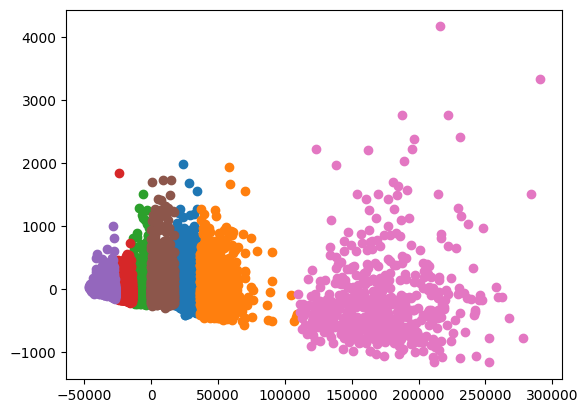

In [ ]:
for cluster in clus:
  plt.scatter(cluster['1'],cluster["2"])
plt.show()